In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# load data với dữ liệu thô
df = pd.read_csv("raw_depression_dataset.csv", index_col=0)


/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_37040/2507382879.py:2: DtypeWarning: Columns (7,8,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("raw_depression_dataset.csv", index_col=0)


In [3]:
df["Working Professional or Student"].value_counts()

Working Professional or Student
Working Professional    136776
Student                  33924
Name: count, dtype: int64

Baseline: Xử lý data 1 cách cơ bản, làm sạch 1 số cột số chứa mixed data, và fill missing  = 0

In [4]:
# 1. Drop irrelevant columns
df_clean = df.drop(columns=['Name'])

# 2. Clean Numeric Columns with Mixed Data
numeric_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
for col in numeric_cols:
    # coerce errors turns 'Error', '??', 'High' etc into NaN
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 3. Drop Duplicates (always good for preliminary cleaning)
df_clean = df_clean.drop_duplicates()


In [5]:
df_student = df_clean[df_clean["Working Professional or Student"] == "Student"]
df_working_professional = df_clean[df_clean["Working Professional or Student"] == "Working Professional"]

In [6]:
df_student = df_student.select_dtypes(include=['number']).fillna(0)
df_working_professional = df_working_professional.select_dtypes(include=['number']).fillna(0)

In [7]:
X_student = df_student.drop("Depression", axis=1)
y_student = df_student["Depression"]

X_worker = df_working_professional.drop("Depression", axis=1)
y_worker = df_working_professional["Depression"]


In [8]:
RANDOM_STATE = 42
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X_student, y_student, stratify=y_student, random_state=RANDOM_STATE)
X_train_worker, X_test_worker, y_train_worker, y_test_worker = train_test_split(X_worker, y_worker, stratify=y_worker, random_state=RANDOM_STATE)

In [9]:
student_model = RandomForestClassifier()
working_professional_model = RandomForestClassifier()

In [10]:
student_model.fit(X_train_student, y_train_student)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
working_professional_model.fit(X_train_worker, y_train_worker)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred_student = student_model.predict(X_test_student)
y_pred_worker = working_professional_model.predict(X_test_worker)

Classification Report for Student MODEL
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3126
           1       0.81      0.82      0.82      4401

    accuracy                           0.79      7527
   macro avg       0.78      0.78      0.78      7527
weighted avg       0.78      0.79      0.78      7527



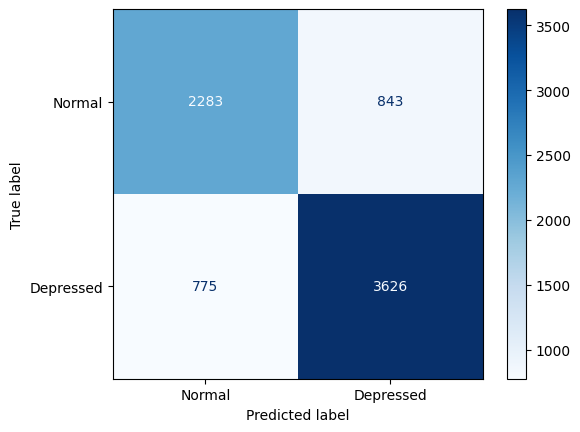

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classification Report for Student MODEL")
print(classification_report(y_test_student, y_pred_student))

# Vẽ ma trận
ConfusionMatrixDisplay.from_predictions(y_test_student, y_pred_student, display_labels=["Normal", "Depressed"], cmap="Blues")
plt.show()


Classification Report for Student MODEL
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28109
           1       0.67      0.59      0.63      2505

    accuracy                           0.94     30614
   macro avg       0.82      0.78      0.80     30614
weighted avg       0.94      0.94      0.94     30614



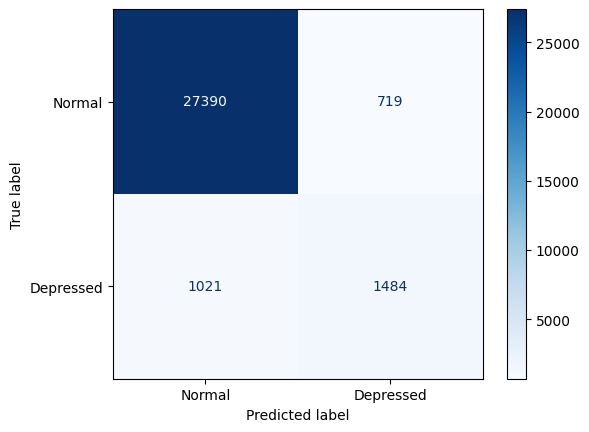

In [14]:
print("Classification Report for Student MODEL")
print(classification_report(y_test_worker, y_pred_worker))

# Vẽ ma trận
ConfusionMatrixDisplay.from_predictions(y_test_worker, y_pred_worker, display_labels=["Normal", "Depressed"], cmap="Blues")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6527928-bbf4-4c9a-8760-1f30ce0e5ba3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>